## Analysing Text Content

***
**Importing Necessary Libraries**

In [2]:
# Standard Libraries
import os 
import re 
import string 
import numpy as np
from collections import Counter

# Text Processing Library 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from textblob import TextBlob
from wordcloud import WordCloud


# Data Visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image

**Load the dataset**

In [200]:
filepath = 'data\\raw\\Harry Potter 1 - Sorcerers Stone.txt'

# Read the data
with open(filepath, 'r') as f:
    text = f.read()


In [9]:
# Constants 
STOPWORDS = stopwords.words('english')

## Utility Functions

In [189]:
# Cleaning Function 

def clean_text(text):
    '''
        Function which returns a clean text 
    '''
    
    # Lower case 
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d', '', text)
    
    # Replace \n and \t functions 
    text = re.sub(r'\n', '', text)
    text = text.strip()
    
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove Stopwords and Lemmatise the data
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in STOPWORDS]
    text = ' '.join(text)
    
    return text
    

## Text Analysis 

In [5]:
# Clean the data 
text = clean_text(text)

### Word Clouds

In [228]:
# Create a word cloud function 
def create_wordcloud(text, image_path = None):
    '''
    Pass a string to the function and output a word cloud
    
    :param text: The text for wordcloud
    :param image_path (optional): The image mask with a white background (default None)
    '''
    if image_path == None:
        # Generate the word cloud
        wordcloud = WordCloud(width = 600, height = 600, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 10).generate(text) 
    
    else:
        mask = np.array(Image.open(image_path))
        wordcloud = WordCloud(width = 600, height = 600, 
                    background_color ='white', 
                    stopwords = STOPWORDS,
                    mask=mask,
                    min_font_size = 5).generate(text) 
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation = 'nearest') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

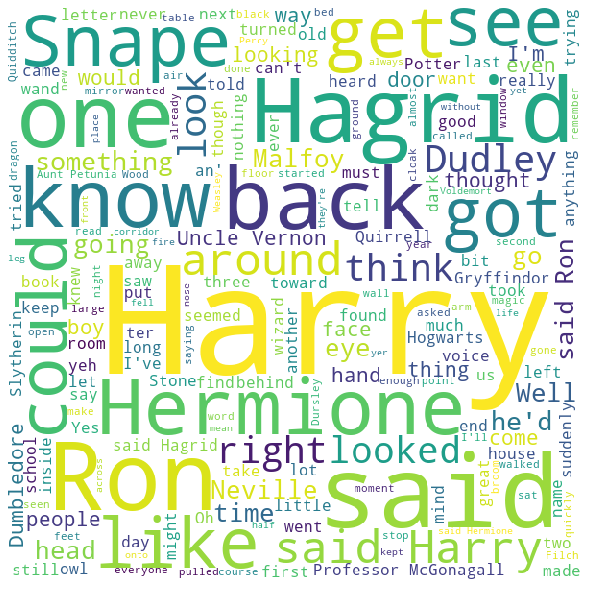

In [229]:
create_wordcloud(text)

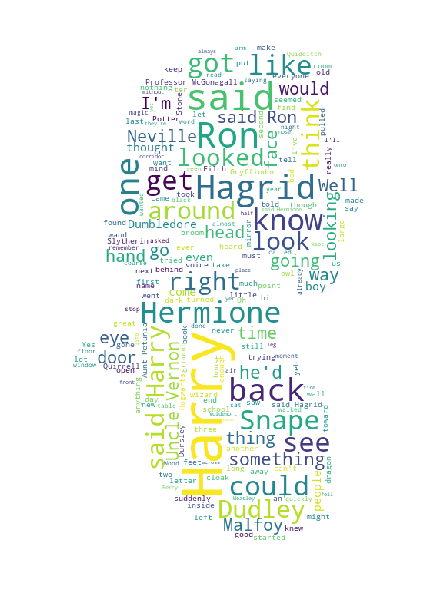

In [247]:
create_wordcloud(text, image_path='images/snape.jpg')

### n-gram analysis

In [8]:
def plot_ngrams(text, n=2, topk=15):
    '''
    Function to plot the most commonly occuring n-grams in bar plots 
    
    '''
    tokens = text.split()
    
    # get the ngrams 
    ngram_phrases = ngrams(tokens, n)
    
    # Get the most common ones 
    most_common = Counter(ngram_phrases).most_common(topk)
    
    # Make word and count lists 
    words, counts = [], []
    for phrase, count in most_common:
        word = ' '.join(phrase)
        words.append(word)
        counts.append(count)
    
    # Plot the barplot 
    plt.figure(figsize=(10, 6))
    title = "Most Common " + str(n) + "-grams in the text"
    plt.title(title)
    ax = plt.bar(words, counts)
    plt.xlabel("n-grams found in the text")
    plt.ylabel("Ngram frequencies")
    plt.xticks(rotation=90)
    plt.show()

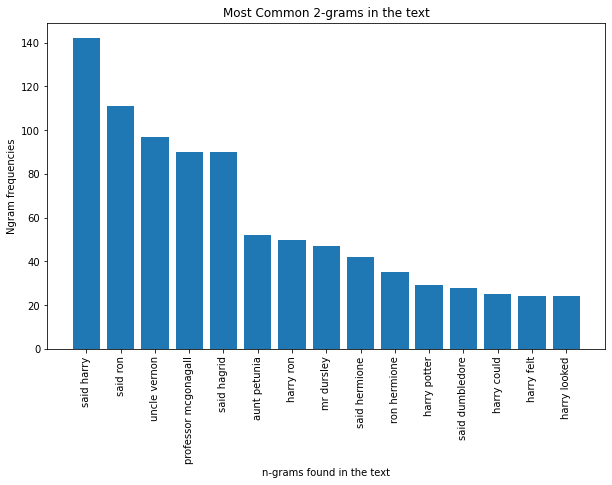

In [9]:
plot_ngrams(text, n=2, topk=15)

## Sentence  Structure

### POS Tagging

In [10]:
import spacy
from spacy import displacy
from pathlib import Path
from spacy.matcher import PhraseMatcher, Matcher
from spacy.tokens import Span

In [93]:
nlp = spacy.load('en_core_web_md')

In [106]:
def pos_tag_counts(doc):
    """
    Calculates frequency distribution of univerasal POS Tags
    
    :param doc: spacy nlp object
    
    :returns frquency: tag counts (dictionaty)
    """
    tags = []
    for token in doc:
        tags.append(token.pos_)
    frequency = dict(Counter(tags).most_common())    
    return frequency
    

In [107]:
def entity_counts(doc):
    """
    Calculates frequency distribution of entities
    
    :param doc: spacy nlp object
    
    :returns frquency: entity counts (dictionaty)
    """
        
    tags = []
    for token in doc.ents:
        tags.append(token.label_)
    frequency = dict(Counter(tags).most_common())

    return frequency

In [108]:
def structure_anslysis(text, display = None, entities = None):
    """
    visualizes POS tag counts, Entity counts & word-entity highlighted text
    
    :param text: The text to perform analysis on
    :param display: whether to diplay highlighted text (default None)
    :param entities: options for diplay (default None)
    
    :returns pos_freq (dictionary), ent_freq(dictionary)
    """
    
    doc = nlp(text)
    pos_freq = pos_tag_counts(doc)
    ent_freq = entity_counts(doc)
    
    fig, axs = plt.subplots(1, 2, figsize = (15, 6))
    
    sns.barplot(list(pos_freq.keys()), list(pos_freq.values()), color='#e84118', ax = axs[0])
    axs[0].set_title('POS COUNTS')
    axs[0].set_xticklabels(labels = list(pos_freq.keys()), rotation = 90)
    
    sns.barplot(list(ent_freq.keys()), list(ent_freq.values()), color='#273c75', ax = axs[1])
    axs[1].set_title('ENTITY COUNTS')
    axs[1].set_xticklabels(labels = list(ent_freq.keys()), rotation = 90)    
    
    plt.show()
    
    if display is not None:
        options = {'ents': entities}
        displacy.render(doc, style="ent", options=options, jupyter=True)        
        
    return pos_freq, ent_freq

In [109]:
text = "The Godfather is a 1972 American crime film directed by Francis Ford Coppola who co-wrote the screenplay with Mario Puzo, based on Puzo's best-selling 1969 novel of the same name."

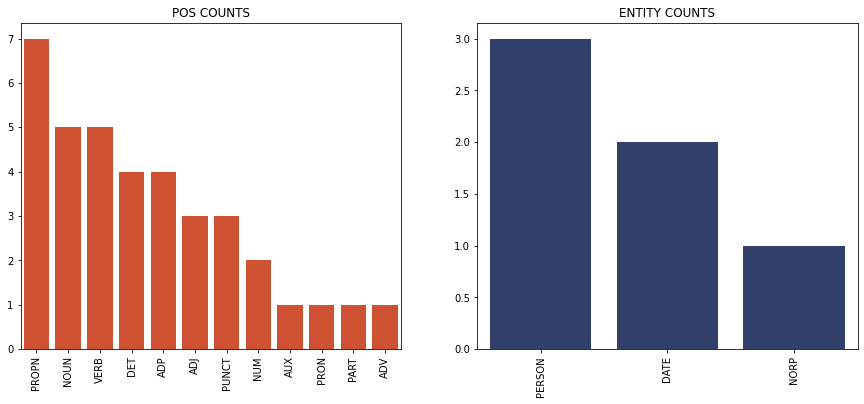

In [110]:
pos_freq, ent_freq = structure_anslysis(text, display=True, entities = None)

### Adding Entities

In [177]:
f = open('spells.txt', 'r')
spells = f.read().split('\n')
f.close()

In [178]:
print(len(spells))

286


In [179]:
spells[14:24]

['Aparecium',
 'Appare Vestigium',
 'Apparition',
 'Aqua Eructo',
 'Arania Exumai',
 'Arresto Momentum',
 'Arrow-shooting spell',
 'Ascendio',
 'Avada Kedavra',
 'Avifors']

In [ ]:
matcher = PhraseMatcher(nlp.vocab)

In [3]:
filepath = 'data\\raw\\Harry Potter 7 - Deathly Hollows.txt'

# Read the data
with open(filepath, 'r') as f:
    text = f.read()


In [210]:
def visualize_custom_ents(entities, text, matcher, name):
    """
    :param entities: List of entities to be added as new entity tag - items must be unique
    :param text: The text in which the entities are to be tagged - max length 100000000 (if not it will be truncated)
    :param matcher: The phrase matcher object from spacy
    :param name: The name of the new entity type
    
    :returns spell_spans: list of spans of matched entities
    """
    
    doc = nlp(' '.join(text.split(' ')[30000:]).lower())
    patterns = nlp.tokenizer.pipe([e.lower() for e in entities])
    matcher.add('Spell Matcher', None, *patterns)
    matches = matcher(doc)
    print('Number of matches: ', len(matches))
    spells_spans = [Span(doc, start, end, label = name) for _, start, end in matches]
    doc.ents = spells_spans
    
    options = {'colors': {'SPELL': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)'}, 'ents': [name]}
    displacy.render(doc, style="ent", jupyter=True, options=options)        
    
    return spells_spans

In [211]:
spell_spans = visualize_custom_ents(spells, text, matcher, 'SPELL')

Number of matches:  141


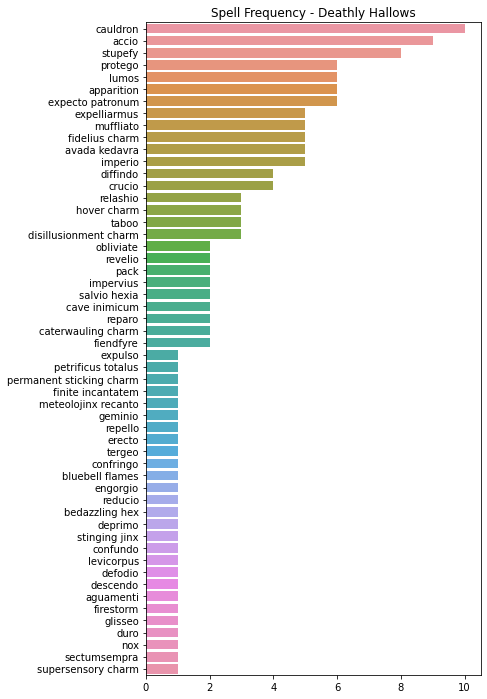

In [229]:
used_spells = [spell.text for spell in spell_spans]
frequency = dict(Counter(used_spells).most_common())
plt.figure(figsize=(6,12))
plt.title('Spell Frequency - Deathly Hallows')
sns.barplot(y = list(frequency.keys()), x = list(frequency.values()))
plt.show()

### Similarity Analysis

In [266]:
from gensim import utils
import pprint
import gensim
import gensim.downloader as api
import warnings
import tempfile
warnings.filterwarnings(action='ignore')

In [205]:
#wv = api.load('word2vec-google-news-300')

In [1]:
# creating corpus to train word2vec model

corpus_path1 = 'data\\raw\\Harry Potter 1 - Sorcerers Stone.txt'
corpus_path2 = 'data\\raw\\Harry Potter 2 - Chamber of Secrets.txt'
corpus_path3 = 'data\\raw\\Harry Potter 3 - The Prisoner Of Azkaban.txt'
corpus_path4 = 'data\\raw\\Harry Potter 6 - The Half Blood Prince.txt'
corpus_path5 = 'data\\raw\\Harry Potter 5 - Order of the Phoenix.txt'

corpus = ''
paths = [corpus_path1,corpus_path2,corpus_path3,corpus_path4,corpus_path5]

for path in paths:    
    f = open(path, 'r')    
    corpus+= f.read()
    print(path, '...loaded')
    f.close()

data\raw\Harry Potter 1 - Sorcerers Stone.txt ...loaded
data\raw\Harry Potter 2 - Chamber of Secrets.txt ...loaded
data\raw\Harry Potter 3 - The Prisoner Of Azkaban.txt ...loaded
data\raw\Harry Potter 6 - The Half Blood Prince.txt ...loaded
data\raw\Harry Potter 5 - Order of the Phoenix.txt ...loaded


In [3]:
f = open('corpus.txt', 'w')
f.write(corpus)
f.close()

In [170]:
class MyCorpus(object):
    """An interator that yields sentences (lists of str)."""

    def __iter__(self):        
        for line in corpus.split('\n'):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

In [171]:
# training word2vec model on our corpus
sentences = MyCorpus()
model = gensim.models.Word2Vec(sentences = sentences, min_count = 5, size = 300)

In [172]:
print(f'Vocabulary: {len(model.wv.vocab)}')

Vocabulary: 6997


In [173]:
# saving the model
with tempfile.NamedTemporaryFile(prefix='gensim-model-', delete=False) as tmp:
    temporary_filepath = tmp.name    
    model.save(temporary_filepath)
    
    print('Model saved to ', temporary_filepath)
    


Model saved to  C:\Users\Arpan\AppData\Local\Temp\gensim-model-ak9m5_ve


In [174]:
# load saved model
new_model = gensim.models.Word2Vec.load(temporary_filepath)

In [247]:
google =  gensim.models.KeyedVectors.load_word2vec_format(path, binary=True, limit = 500000)

In [295]:
def get_top_similarity(obj, model = None, n = 10, plot = False):
    """
    :param obj: The string for which word simmilarity to be calculated
    :param model: The model to use (if None google-news-300 is used)
    :param n: Top n similar words to return
    :param plot: Whethe to plot word similarity bar plot (default False)
    """
    
    obj = obj.lower().strip()

    if model == None:
        print('Loading default model: google-news-300')
        model = google
            
    try:
        if len(obj.split()) >=1:
            vector = np.array([model[word] for word in obj.split(' ')]).mean(axis = 0)
        else:
            vector = model[obj]
        
        similarity = model.wv.similar_by_vector(vector, topn = n+1)[1:]        
        
        if plot:
            keys = [k for k,v in similarity if k!=obj]
            values = [v for k,v in similarity if k!= obj]
            sns.barplot(x = keys, y = values)
            plt.xticks(rotation = 90)
            plt.show()
            
        return similarity
    except:
        print('Try another word or model.')

Loading default model: google-news-300


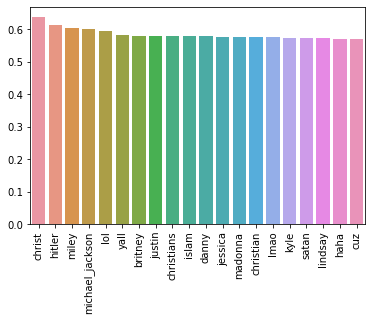

[('christ', 0.6374227404594421),
 ('hitler', 0.6142934560775757),
 ('miley', 0.6040133237838745),
 ('michael_jackson', 0.6003056168556213),
 ('lol', 0.5945830941200256),
 ('yall', 0.5818169713020325),
 ('britney', 0.5804852843284607),
 ('justin', 0.5801588892936707),
 ('christians', 0.5790253281593323),
 ('islam', 0.578999936580658),
 ('danny', 0.5786775350570679),
 ('jessica', 0.5773040652275085),
 ('madonna', 0.5763240456581116),
 ('christian', 0.5757344961166382),
 ('lmao', 0.5755050182342529),
 ('kyle', 0.574030339717865),
 ('satan', 0.5739787220954895),
 ('lindsay', 0.5738206505775452),
 ('haha', 0.5708335638046265),
 ('cuz', 0.5707555413246155)]


In [291]:
similarity = get_top_similarity('jesus', plot = True, n = 20)
pprint.pprint(similarity)

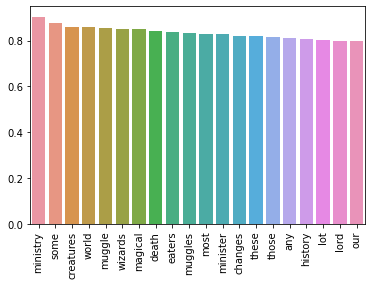

[('ministry', 0.9045515060424805),
 ('some', 0.8749832510948181),
 ('creatures', 0.8611581921577454),
 ('world', 0.857775092124939),
 ('muggle', 0.8526771068572998),
 ('wizards', 0.8522207140922546),
 ('magical', 0.8512438535690308),
 ('death', 0.8419329524040222),
 ('eaters', 0.8385944366455078),
 ('muggles', 0.830790102481842),
 ('most', 0.830134928226471),
 ('minister', 0.8283530473709106),
 ('changes', 0.8213456869125366),
 ('these', 0.8184929490089417),
 ('those', 0.8166568875312805),
 ('any', 0.8095938563346863),
 ('history', 0.8077568411827087),
 ('lot', 0.8039171099662781),
 ('lord', 0.7996814846992493),
 ('our', 0.7985629439353943)]


In [294]:
similarity = get_top_similarity('magic', model, plot = True, n = 20)
pprint.pprint(similarity)